# This notebook compiled from
### https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504



In [10]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
import librosa
import librosa.display



In [11]:
data_path = '/Users/johnlennon/Downloads/Yandex'
train_path = '/Users/johnlennon/Downloads/Yandex/train'
test_path = '/Users/johnlennon/Downloads/Yandex/test'
train_dir = '/Users/johnlennon/Downloads/Yandex/train'
train_csv = '/Users/johnlennon/Downloads/Yandex/train/targets.tsv'
#man's voice
train_file0 = '/Users/johnlennon/Downloads/Yandex/train/0a0b16288ff78515d6c091cfeb813bad.wav'
#woman's voice
train_file1 = '/Users/johnlennon/Downloads/Yandex/train/0a1f7e9733c1896cef712f25a3518bcf.wav'

### lets some practice with the audio and libros

In [64]:
# Listen
from IPython.display import Audio
Audio(train_file1)

In [13]:
# bitrate with amplitude 2 examples
# it show the amplitude in bitrate score in time array

# 1
# import librosa
# # Load the audio file
# AUDIO_FILE = './audio.wav'
# samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
# view raw
# 2
from scipy.io import wavfile
sample_rate, samples = wavfile.read(train_file0)

print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[20000:20010])


Example shape  (41984,) Sample rate  16000 Data type <class 'numpy.ndarray'>
[-4598 -4558 -4362 -4070 -1394  1671  2382  2681  3613  4587]


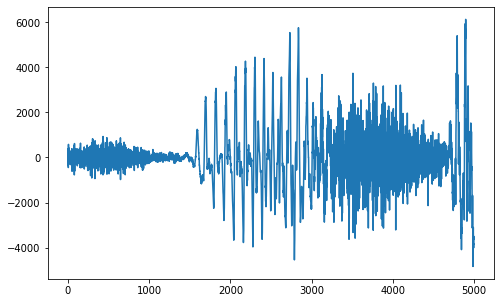

In [14]:
# show the signal from 15000 to 2000(all signal is 41984) of amplitude
t = [i for i in range(5000)]
y = samples[15000:20000]
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.plot(t, y)
plt.show()

Fourie is of type <class 'numpy.ndarray'> with shape (1025, 83)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


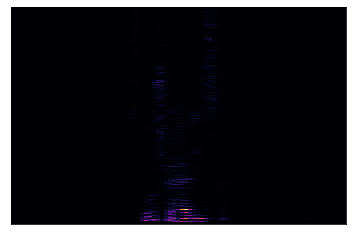

In [15]:
# make a Fourie spectrograme in signal duration
samples, sample_rate = librosa.load(train_file0, sr=None)
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)
print (f'Fourie is of type {type(sgram)} with shape {sgram.shape}')

Mel is of type <class 'numpy.ndarray'> with shape (1025, 83)


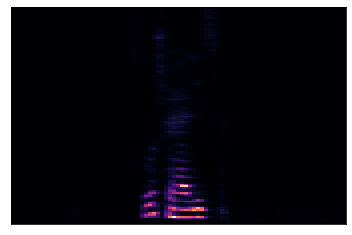

In [16]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)
print (f'Mel is of type {type(sgram_mag)} with shape {sgram_mag.shape}')

Mel in Db is of type <class 'numpy.ndarray'> with shape (128, 83)


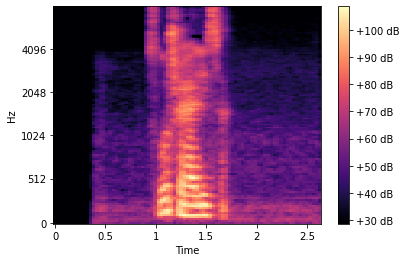

In [17]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
print (f'Mel in Db is of type {type(mel_sgram)} with shape {mel_sgram.shape}')

MFCC is of type <class 'numpy.ndarray'> with shape (20, 83)


/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_8900/1066980303.py:9: FutureWarning: Pass y=[0.         0.         0.         ... 0.00183105 0.00186157 0.00167847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


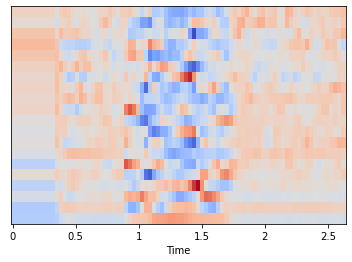

In [18]:
# try mfcc and downgrade number of hiperparametres


import librosa
import librosa.display

# Load the audio file
samples, sample_rate = librosa.load(train_file0, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type with shape (20, 83)
# sgram.shape has beine (1025, 83)
# mel_sgram has beine (128, 83)

MFCC is of type <class 'numpy.ndarray'> with shape (20, 169)


/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_8900/3832274049.py:9: FutureWarning: Pass y=[0.         0.         0.         ... 0.00067139 0.0007019  0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


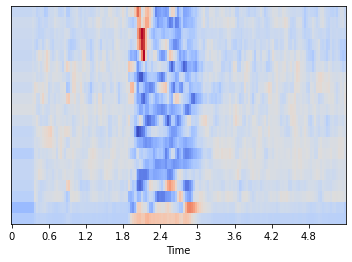

In [63]:
# try mfcc and downgrade number of hiperparametres


import librosa
import librosa.display

# Load the audio file
samples, sample_rate = librosa.load(train_file1, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type with shape (20, 83)
# sgram.shape has beine (1025, 83)
# mel_sgram has beine (128, 83)

## Start download samples

In [1]:
# ----------------------------
# Prepare training data from Metadata file
# ----------------------------
import pandas as pd
from pathlib import Path

download_csv_path = '/Users/johnlennon/Downloads/Yandex'

# Read metadata file
metadata_file = f'{download_csv_path}/targets.tsv'
df = pd.read_csv(metadata_file, names=['name', 'classID'],  
                 thousands=',', 
                 sep='\t')
df.head()

# Construct file path by concatenating fold and file name
df['relative_path'] = df['name'].astype(str) + '.' + 'wav'

# # Take relevant columns
df = df[['relative_path', 'classID']]
print(f'Shape of df {df.shape}','\n', df.head())


Shape of df (13936, 2) 
                           relative_path  classID
0  5d1f7e43366513a1d0a6ec5640c3dc24.wav        1
1  9a701a4536a05b6610a590a9fe702ed8.wav        1
2  cad0b8547008d1524c1a0e5fd51f9908.wav        1
3  4bbe607e7dc95460e2cc1a6ee5f4dfa6.wav        0
4  30fb32cba90b34af26f3f14f5d636805.wav        0


In [2]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)
  # ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  @staticmethod
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))
  # ----------------------------
  # Since Resample applies to a single channel, we resample one channel at a time
  # ----------------------------
  @staticmethod
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  # ----------------------------
  # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
  # ----------------------------
  @staticmethod
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      
    return (sig, sr)

  # ----------------------------
  # Shifts the signal to the left or right by some percent. Values at the end
  # are 'wrapped around' to the start of the transformed signal.
  # ----------------------------
  @staticmethod
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)


  # ----------------------------
  # Augment the Spectrogram by masking out some sections of it in both the frequency
  # dimension (ie. horizontal bars) and the time dimension (vertical bars) to prevent
  # overfitting and to help the model generalise better. The masked sections are
  # replaced with the mean value.
  # ----------------------------
  @staticmethod
  def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)

    return aug_spec

In [3]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 10000
    self.sr = 16000
    self.channel = 2
    self.shift_pct = 0.4
            
  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)    
    
  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.data_path + self.df.loc[idx, 'relative_path']
    # Get the Class ID
    class_id = self.df.loc[idx, 'classID']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same 
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    
    reaud = AudioUtil.resample(aud, self.sr)
    
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return aug_sgram, class_id

Prepare Batches of Data with the Data Loader

In [50]:
#Prepare Batches of Data with the Data Loader

from torch.utils.data import random_split
data_path = '/Users/johnlennon/Downloads/Yandex/train/'
myds = SoundDS(df, data_path)

# Random split of 80:20 between training and validation
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
# train_ds, val_ds = random_split(myds, [num_train, num_val])

# Create training and validation data loaders
# train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
# val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

train_dl = torch.utils.data.DataLoader(myds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(myds, batch_size=16, shuffle=False)




In [51]:
# check the bitrate of samples
from scipy.io.wavfile import read as read_wav
import os
import glob

i=0
for file_name in glob.glob(os.path.join(data_path, '*.wav')):

    i+=1
# os.chdir(data_path) # change to the file directory
    try:
        sampling_rate, data=read_wav(file_name) # enter your filename
    except:
        print(sampling_rate, i, file_name.split('/')[-1])

In [52]:
import torch.nn.functional as F
from torch.nn import init
from torch import nn


# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Second Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)
 
    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cpu')

In [53]:
# ----------------------------
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')

  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set
    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        inputs, labels = data[0].to(device), data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

  print('Finished Training')
  
num_epochs=8   # Just for demo, adjust this higher.
training(myModel, train_dl, num_epochs)

Epoch: 0, Loss: 1.51, Accuracy: 0.58
Epoch: 1, Loss: 0.32, Accuracy: 0.89
Epoch: 2, Loss: 0.23, Accuracy: 0.92
Epoch: 3, Loss: 0.20, Accuracy: 0.93
Epoch: 4, Loss: 0.18, Accuracy: 0.94
Epoch: 5, Loss: 0.16, Accuracy: 0.95
Epoch: 6, Loss: 0.16, Accuracy: 0.95
Epoch: 7, Loss: 0.15, Accuracy: 0.95
Finished Training


In [20]:
train_dl

In [62]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
    correct_prediction = 0
    incorrect_prediction = 0
    total_prediction = 0

  # Disable gradient updates
    with torch.no_grad():
        itr = 0
        for data in val_dl:
            itr +=1
            # Get the input features and target labels, and put them on the GPU
            inputs, labels = data[0].to(device), data[1].to(device)
            # Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s
            # Get predictions
            outputs = model(inputs)
            # Get the predicted class with the highest score
            _, prediction = torch.max(outputs,1)
            if (prediction.sum()!=labels.sum()):
                for i in range(len(prediction)):
                    if prediction[i] != labels[i]:
                        exclude_num = 16*itr +i
                        file_name = df['relative_path'][exclude_num]
                        print(exclude_num, file_name)
            
            # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            incorrect_prediction += (prediction != labels).sum().item()
            total_prediction += prediction.shape[0]
    
    acc = correct_prediction/total_prediction
    err = incorrect_prediction
    print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}, Errors {err}')

# Run inference on trained model with the validation set
inference(myModel, val_dl)

49 fa9c8c6eb7cbdcae09a2431add4e1cd9.wav
89 4b16def7b004557c24fe52ef5d11cb2c.wav
106 e42499dc9dc84279a31c4b7eb982b073.wav
140 a47851029b950586405129c085bb2f97.wav
154 9f7e8f4460c68aa93b4a8f035cf1aa18.wav
161 bfe0f0edb0a499f025c4a760b728b496.wav
189 c6aaf8e95a3ec5ab2d4c7230ec0a2d9e.wav
192 6c9f34f1d9efabebcde59b56b964e751.wav
209 ff35a3bc128b7a703468f892aac236cd.wav
221 0f3848ba707f29f81e923d1a4a536a0e.wav
226 e15d9495c077adef96c95c6c75b4bfa9.wav
228 e9234703f224482aa4d85c46b659afa5.wav
229 5dcae3a0fcbf49074e35c1ba8eeb51bd.wav
256 d475bcf0dd8a7c8f08b01ed21c93a101.wav
258 ecf989db72ab3aacb4eee8a8497105d6.wav
265 d47e4819188d0c6621fa201261be72c9.wav
270 91c4ab85e4a7eeb6b7a3f41ea761149f.wav
279 c7672f8923884002bc39944823e3aab6.wav
328 1a66914650d9f8f49641419891f5ee53.wav
373 65d7e1c83f120c018887954d5017e7f4.wav
374 ba195a73508fcacd09b5caba7bcdf477.wav
382 8cd30b1c87717557fd16ab4a00a545bf.wav
397 16142ae5f861cd0e05755ccbd12b43e8.wav
407 7c48cbb879f8822b92d44bdc7b5e5c4b.wav
409 85b0240e2329af

KeyboardInterrupt: 

In [42]:



audio_file = data_path + '/train/'+ df.loc[0, 'relative_path']
    # Get the Class ID
class_id = df.loc[0, 'classID']

aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same 
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    
reaud = AudioUtil.resample(aud, 16000)
    
rechan = AudioUtil.rechannel(reaud, 2)

dur_aud = AudioUtil.pad_trunc(rechan, 10000)
shift_aud = AudioUtil.time_shift(dur_aud, 0.4)
sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
test_ds = aug_sgram, class_id
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=16, shuffle=False)

# output = myModel(test_dl)

TypeError: object of type 'int' has no len()

In [45]:
myds1 = SoundDS(df, data_path + '/train/')
test_dl = torch.utils.data.DataLoader(myds1, batch_size=16, shuffle=False)
inference(myModel, test_dl)

Accuracy: 0.95, Total items: 13936, Errors 675


In [47]:
for data in myds1:
    print(data)
    break

(tensor([[[-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         ...,
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245]],

        [[-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         ...,
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245],
         [-52.0245, -52.0245, -52.0245,  ..., -52.0245, -52.0245, -52.0245]]]), 1)


In [49]:
for data in val_dl:
    print(len(data), data)
    break

2 [tensor([[[[-44.2046, -44.2046, -44.2046,  ..., -44.2046, -44.2046, -44.2046],
          [-44.2046, -44.2046, -44.2046,  ..., -44.2046, -44.2046, -44.2046],
          [-44.2046, -44.2046, -44.2046,  ..., -44.2046, -44.2046, -44.2046],
          ...,
          [-37.7629, -37.7629, -37.7629,  ..., -37.7629, -37.7629, -37.7629],
          [-37.7629, -37.7629, -37.7629,  ..., -37.7629, -37.7629, -37.7629],
          [-44.2046, -44.2046, -44.2046,  ..., -44.2046, -44.2046, -44.2046]],

         [[-44.2046, -44.2046, -44.2046,  ..., -44.2046, -44.2046, -44.2046],
          [-44.2046, -44.2046, -44.2046,  ..., -44.2046, -44.2046, -44.2046],
          [-44.2046, -44.2046, -44.2046,  ..., -44.2046, -44.2046, -44.2046],
          ...,
          [-37.7629, -37.7629, -37.7629,  ..., -37.7629, -37.7629, -37.7629],
          [-37.7629, -37.7629, -37.7629,  ..., -37.7629, -37.7629, -37.7629],
          [-44.2046, -44.2046, -44.2046,  ..., -44.2046, -44.2046, -44.2046]]],


        [[[-45.8861, -45.